In [7]:
import numpy as np
import pandas as pd
import scipy.fft as fft
from scipy import signal
import matplotlib.pyplot as plt
from typing import List
%matplotlib inline

#### Util functions

In [2]:
def generate_sine_wave(freq, sample_rate:int, duration:int):
    
    # Generates samples from 0 to duration (time units) with sample_rate samples
    # per time unit (ex Hz)
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    
    return x, y

def generate_signal(frequencies:List[str], sample_rate:int, duration:int, stdev:float=None):
    
    # Generate array of 0's of size sample_rate*duration
    y = np.zeros(sample_rate*duration)
    
    for freq in frequencies:
        
        t, y_tmp = generate_sine_wave(freq, sample_rate, duration)
        y += y_tmp
    
    # Add noise to the signal
    if stdev:
        
        y += np.random.normal(loc=0, scale=stdev, size=len(y))
        
    return t, y

#### Generate fake signal

In [5]:
SAMPLE_RATE = 440
DURATION = 2

frequencies = [3, 5, 10, 120, 200]
stdev = 3

t, y = generate_signal(frequencies, SAMPLE_RATE, DURATION, stdev)

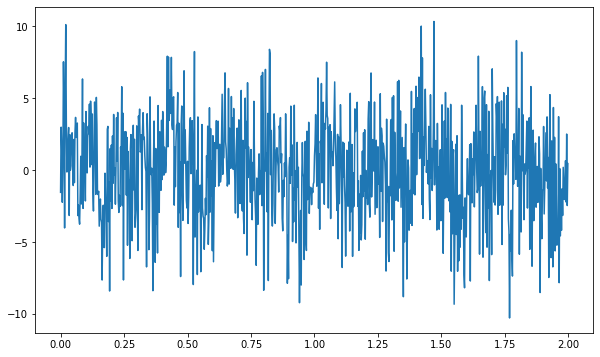

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, y)

#### Lowpass filter

In [39]:
# Cut-off frequency of the filter
fc = 30  

# Normalize the frequency
w = fc / (SAMPLE_RATE / 2) 

# Get difference equation coefficients from butter worth
b, a = signal.butter(15, w, 'low')
y_filtered = signal.filtfilt(b, a, y)

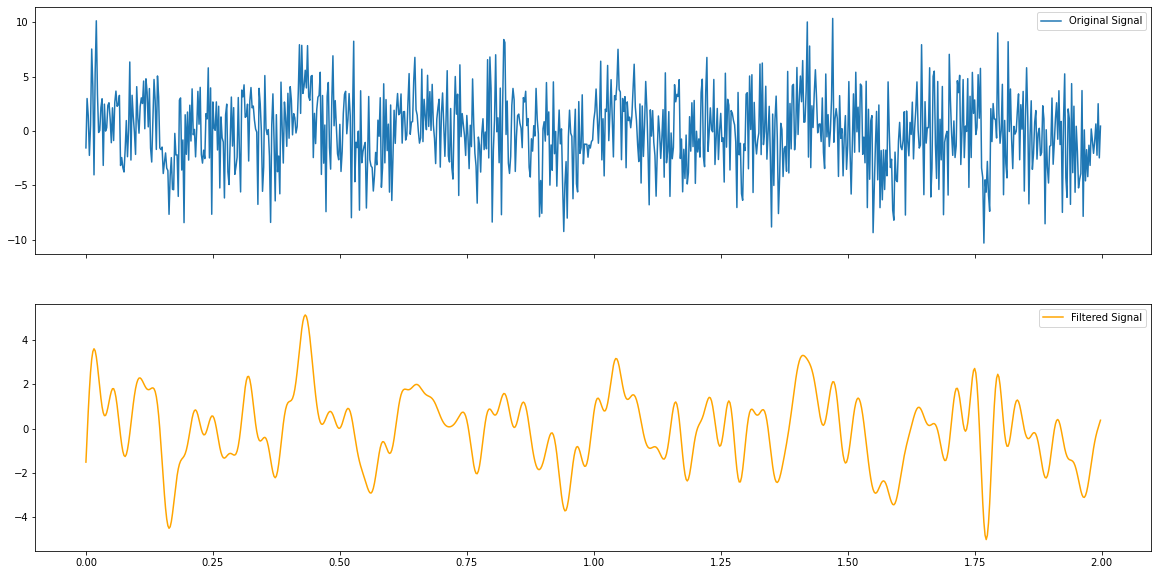

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
ax[0].plot(t, y, label='Original Signal')
ax[0].legend()
ax[1].plot(t, y_filtered, label='Filtered Signal', color='orange')
ax[1].legend()

In [41]:
# Plot frequency and phase response
w, h = signal.freqz(b, a, fs=SAMPLE_RATE)
h_db = 20 * np.log10(abs(h))
h_phase = np.arctan(np.imag(h) / np.real(h))

Text(0, 0.5, 'Gain (db)')

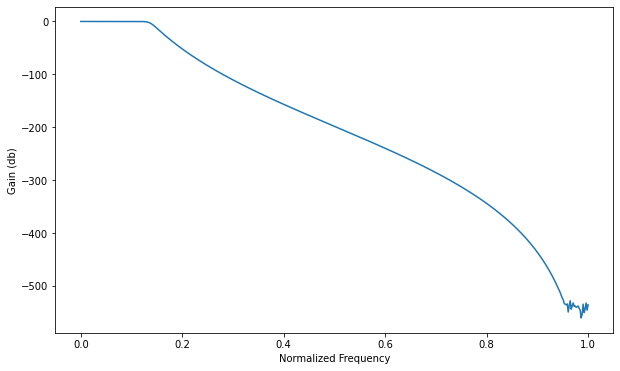

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(w / max(w), h_db)
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Gain (db)')

Text(0, 0.5, 'Phase Response')

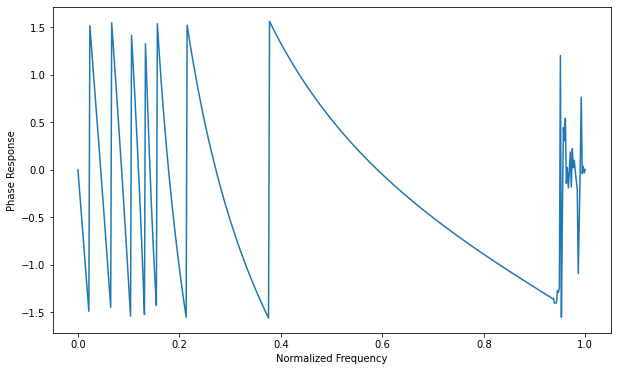

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(w / max(w), h_phase)
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('Phase Response')